In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv


In [2]:
import pandas as pd
earthquake_df = pd.read_csv('/kaggle/input/the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv')
earthquake_df

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00


In [3]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [4]:
earthquake_df.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [5]:
earthquake_df['date'] = pd.to_datetime(earthquake_df.date)
earthquake_df['date']

0         1990-01-01 00:22:33.990000+00:00
1         1990-01-01 00:24:51.210000+00:00
2         1990-01-01 00:34:43.450000+00:00
3         1990-01-01 00:58:32.130000+00:00
4         1990-01-01 01:03:44.490000+00:00
                        ...               
3445746   2023-07-29 10:34:11.941000+00:00
3445747   2023-07-29 10:36:15.715000+00:00
3445748   2023-07-29 10:40:15.940000+00:00
3445749   2023-07-29 10:55:46.040000+00:00
3445750   2023-07-29 11:08:57.884000+00:00
Name: date, Length: 3445751, dtype: datetime64[ns, UTC]

In [6]:
earthquake_df['year']=pd.DatetimeIndex(earthquake_df.date).year
earthquake_yeardf = earthquake_df.groupby('year')[['significance']].max()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


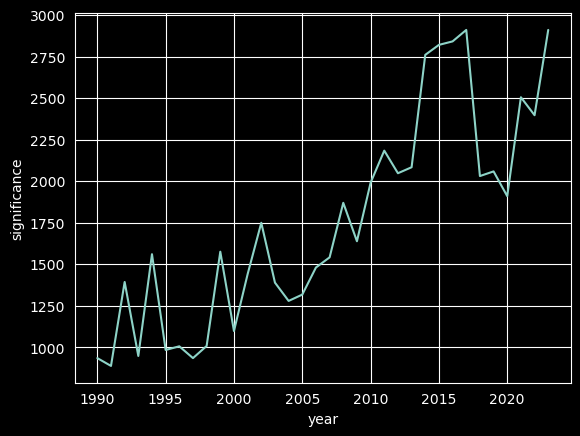

In [8]:
sns.set_style("darkgrid")
plt.style.use("dark_background")
sns.lineplot(x="year", y="significance",data=earthquake_yeardf);

In [9]:
strongest_earthquake_df=earthquake_df.sort_values('magnitudo',ascending=False).head(10)

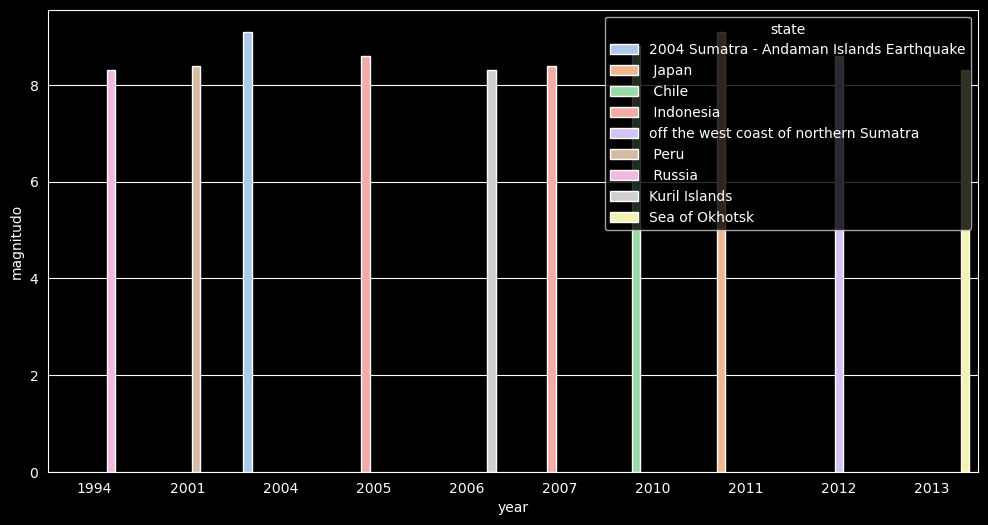

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=strongest_earthquake_df, x="year", y="magnitudo",hue="state",palette='pastel');

In [11]:
longest_earthquake= earthquake_df.sort_values('time',ascending=False).head(10)
longest_earthquake

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,year
3445750,1690628937884,"35 km W of Karluk, Alaska",automatic,0,12,earthquake,0.90,Alaska,-155.051000,57.564800,250.000,2023-07-29 11:08:57.884000+00:00,2023
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00,2023
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00,2023
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00,2023
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00,2023
3445745,1690626815980,"0 km SW of Universal City, CA",automatic,0,16,earthquake,1.03,California,-118.356833,34.135500,15.710,2023-07-29 10:33:35.980000+00:00,2023
3445744,1690626699102,"87 km NNW of Karluk, Alaska",automatic,0,15,earthquake,1.00,Alaska,-155.204500,58.241300,0.000,2023-07-29 10:31:39.102000+00:00,2023
3445743,1690626164400,"16 km ESE of Julian, CA",automatic,0,11,earthquake,0.85,California,-116.432833,33.035833,7.370,2023-07-29 10:22:44.400000+00:00,2023
3445742,1690625393345,Southern Alaska,automatic,0,22,earthquake,1.20,Southern Alaska,-152.159400,60.104900,53.900,2023-07-29 10:09:53.345000+00:00,2023
3445741,1690625310020,"4 km SW of Redlands, CA",automatic,0,16,earthquake,1.01,California,-117.215500,34.030167,14.450,2023-07-29 10:08:30.020000+00:00,2023


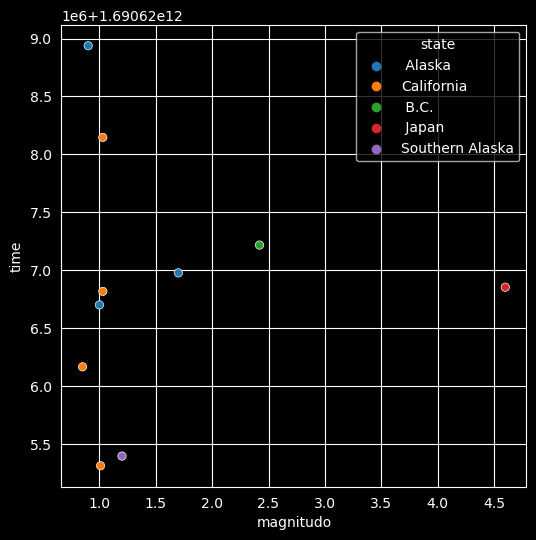

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="magnitudo", y="time",
                hue="state",palette="tab10",data=longest_earthquake);

In [13]:
signi_max = earthquake_df.groupby('year')['significance'].transform(max) == earthquake_df['significance']
earthquake_df[signi_max]

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,year
18373,640445959010,"75 km NNW of Gorontalo, Indonesia",reviewed,0,936,earthquake,7.80,Indonesia,122.857000,1.186000,25.700,1990-04-18 13:39:19.010000+00:00,1990
69105,672357411820,"34 km S of Limón, Costa Rica",reviewed,0,889,earthquake,7.60,Costa Rica,-83.073000,9.685000,10.000,1991-04-22 21:56:51.820000+00:00,1991
101804,693391393410,"248 km E of Kuril’sk, Russia",reviewed,0,889,earthquake,7.60,Russia,151.021000,45.533000,24.700,1991-12-22 08:43:13.410000+00:00,1991
138239,709732654130,"The 1992 Landers Earthquake, California",reviewed,0,1394,earthquake,7.30,California,-116.437000,34.200000,-0.097,1992-06-28 11:57:34.130000+00:00,1992
234301,744798864930,"32 km S of Inarajan Village, Guam",reviewed,0,949,earthquake,7.80,Guam,144.801000,12.982000,59.300,1993-08-08 08:34:24.930000+00:00,1993
269449,758809855390,"1km NNW of Reseda, CA",reviewed,0,1561,earthquake,6.70,California,-118.537000,34.213000,18.202,1994-01-17 12:30:55.390000+00:00,1994
371403,807081083630,"36 km NNE of Antofagasta, Chile",reviewed,0,985,earthquake,8.00,Chile,-70.294000,-23.340000,45.600,1995-07-30 05:11:23.630000+00:00,1995
389529,813252953910,"5 km E of El Colomo, Mexico",reviewed,0,985,earthquake,8.00,Mexico,-104.205000,19.055000,33.000,1995-10-09 15:35:53.910000+00:00,1995
416302,824536770550,"101 km ENE of Biak, Indonesia",reviewed,0,1007,earthquake,8.09,Indonesia,136.952000,-0.891000,33.000,1996-02-17 05:59:30.550000+00:00,1996
517886,876822798150,"192 km WSW of Haveluloto, Tonga",reviewed,0,936,earthquake,7.80,Tonga,-176.772000,-22.101000,167.300,1997-10-14 09:53:18.150000+00:00,1997


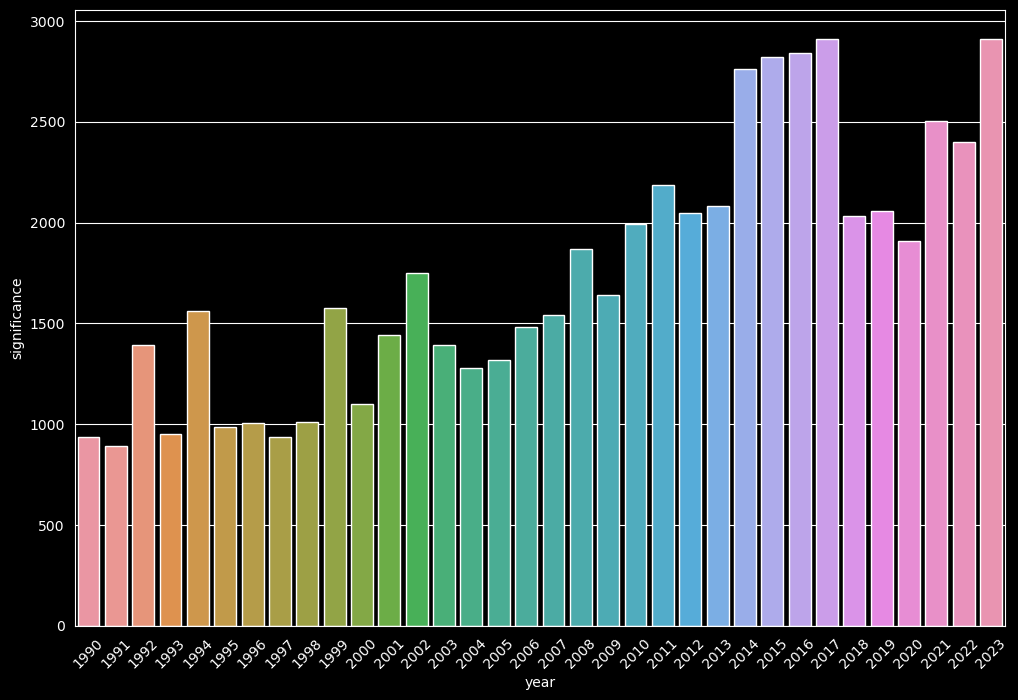

In [14]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(x="year", y="significance",data=earthquake_df[signi_max]);

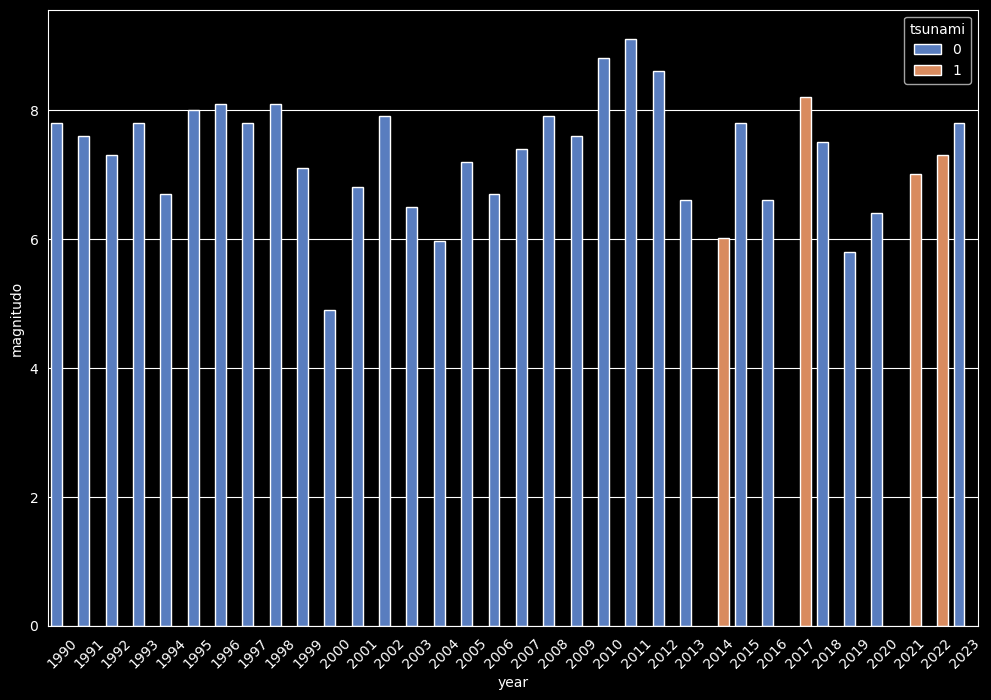

In [15]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(x="year", y="magnitudo", hue="tsunami",palette="muted",
         data=earthquake_df[signi_max]);

/tmp/ipykernel_20/115998377.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  earthquakes= earthquake_df[signi_max].pivot("state", "year", "magnitudo")


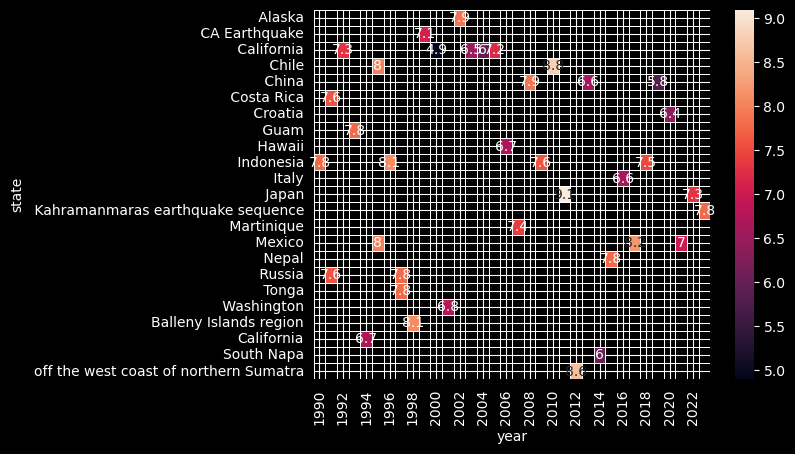

In [16]:
earthquakes= earthquake_df[signi_max].pivot("state", "year", "magnitudo")
sns.heatmap(earthquakes, annot=True, linewidths=.5);